# **Week 3 Solutions**

### Please have a good hard go at your challenge questions before looking through these solutions.

### Here is a bit of motivation cat for you to give those challenges your best shot.

## **You've got this!**

![motivation-cat](..\resources\images\MotivationCat.png)


In [1]:
%run test/week3_test.ipynb

# **Challenge Question 1**
Catastrophic cancellation is a problem in numerical computing where significant digits of precision are lost due to the subtraction of two nearly equal numbers. This loss of precision can lead to highly inaccurate results, especially in floating-point computations.

### Example of Catastrophic Cancellation in Python
Let's consider a mathematical problem where catastrophic cancellation can occur. Suppose we want to compute the value of the expression sqrt(x + 1) - sqrt(x) for a very large x. Theoretically, as x becomes very large, this expression should approach zero. However, due to floating-point precision issues, the result can be inaccurate.

Here's how this can be implemented and demonstrated in Python:

In [49]:
import numpy as np
def unstable_calculation(x):
    return np.sqrt(x + 1) - np.sqrt(x)


### Explanation and Alternative Approach
When subtracting two nearly equal numbers, many of the leading digits cancel out, and the difference is determined by the less significant digits, which are less accurately known. This leads to a result that can be significantly off from the true value.

To avoid catastrophic cancellation, one approach is to reformulate the problem to avoid direct subtraction of nearly equal numbers. Using algebraic manipulation or an alternative formula that is mathematically equivalent but numerically more stable can often help.

For the example above, we can use the mathematical identity:

$$
\sqrt{a} - \sqrt{b} = \frac{(\sqrt{a} - \sqrt{b})(\sqrt{a} + \sqrt{b})}{\sqrt{a} + \sqrt{b}} = \frac{a - b}{\sqrt{a} + \sqrt{b}}
$$

#### Applying this identity, we can rewrite the function in a more stable form:

$$
\frac{(x + 1) - (x)}{\sqrt{x+1} + \sqrt{x}} = \frac{1}{\sqrt{x+1} + \sqrt{x}}
$$

In [50]:
def stable_calculation(x):
    # implement your stable function code here
    return 1/(np.sqrt(x+1)+np.sqrt(x))


In [51]:
# run tests to confirm your stable calculation function
test_stable_calculation()

Test 1 Passed: Stable calculation with small x value
Test 2 Passed: Stable calculation with large x value


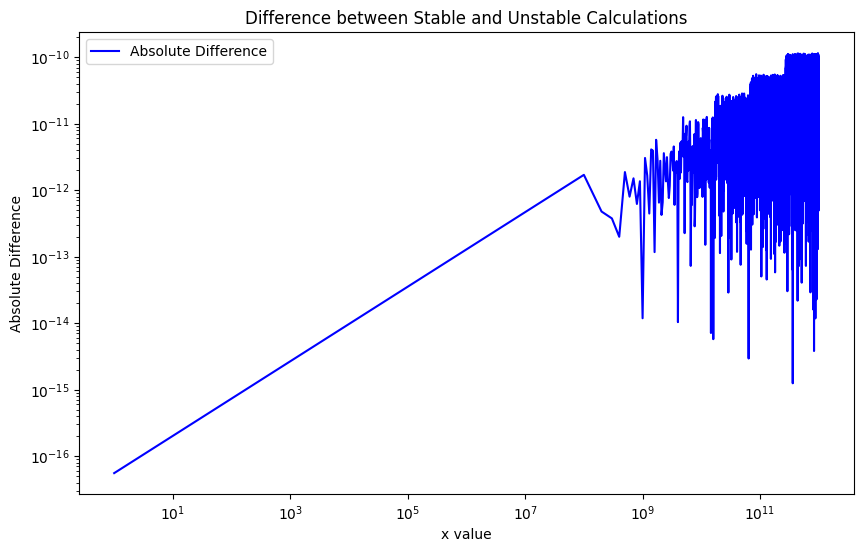

In [52]:
# graph of stable vs unstable
import matplotlib.pyplot as plt

# Generate a range of x values
x_values = np.linspace(1, 1e12, 10000)

# Calculate the absolute difference between stable and unstable calculations
difference = [abs(stable_calculation(x) - unstable_calculation(x)) for x in x_values]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(x_values, difference, label="Absolute Difference", color='blue')
plt.xscale('log')  # Using logarithmic scale for x-axis
plt.yscale('log')  # Using logarithmic scale for y-axis
plt.xlabel('x value')
plt.ylabel('Absolute Difference')
plt.title('Difference between Stable and Unstable Calculations')
plt.legend()
plt.show()


This example is a great way to show that computational mathematics is not always just a lift and shift operation (ie. it's not just as simple as picking up the equation and typing it into python). There are a number of considerations that come into play such as numerical stability as seen in this Challenge Question.

# **Challenge Question 2**
Implement the following set of functions using NumPy:

1. **create_array(x):**
    - Takes a single integer `x` as input.
    - Returns a NumPy 2D array of shape `(x, x)` filled with random integer values between 1 and 100 (inclusive).

2. **slice_array(slice_size, arr):**
    - Takes as input a 2D NumPy array `arr` (created by `create_array`) and an integer `slice_size`.
    - Returns the central region of `arr` with shape `(slice_size, slice_size)`.
    - If `slice_size` is larger than the array or not possible to center, handle gracefully.

3. **column_sum(arr):**
    - Takes a 2D NumPy array `arr` as input.
    - Returns a 1D NumPy array containing the sum of each column in `arr`.

4. **normalise(arr):**
    - Takes a 2D NumPy array `arr` as input.
    - Returns a new array where all values are normalised to be in the range `[0, 1]`, using min-max normalisation.


In [44]:
import numpy as np

def create_array(x: int) -> np.ndarray:
    """
    Returns a NumPy 2D array of shape (x, x) filled with random integer values between 1 and 100 (inclusive).
    """
    return np.random.randint(1, 101, size=(x, x))

def slice_array(arr: np.ndarray, slice_size: int) -> np.ndarray:
    """
    Returns the central region of arr with shape (slice_size, slice_size).
    If slice_size is larger than arr or not possible to center, returns None.
    """
    rows, cols = arr.shape
    if slice_size > rows or slice_size > cols:
        return None  # Can't slice central region
    start_row = (rows - slice_size) // 2
    start_col = (cols - slice_size) // 2
    return arr[start_row:start_row + slice_size, start_col:start_col + slice_size]

def column_sum(arr: np.ndarray) -> np.ndarray:
    """
    Returns a 1D NumPy array containing the sum of each column in arr.
    """
    return np.sum(arr, axis=0)

def normalise(arr: np.ndarray) -> np.ndarray:
    """
    Returns a new array where all values are normalised to be in the range [0, 1], using min-max normalisation.
    """
    arr_min = np.min(arr)
    arr_max = np.max(arr)
    if arr_max == arr_min:
        return np.zeros_like(arr, dtype=float)  # Avoid division by zero
    return (arr - arr_min) / (arr_max - arr_min)

In [48]:
test_numpy_challenge()

Test 1 Passed: Create 5x5 array
Test 2 Passed: Create 1x1 array
Test 3 Passed: Central 3x3 slice from 5x5 array
Test 4 Passed: Central 2x2 slice from 4x4 array
Test 5 Passed: Sum of columns for 2x3 array
Test 6 Passed: Normalise 2x2 array


# **Challenge Question 3**

In this Challenge Question, you are provided with a scenario that involves two sets of data represented as Pandas DataFrames in Python. The first DataFrame, customers_df, contains customer data for a hypothetical energy company, while the second DataFrame energy_usage_df contains each customer's hourly energy usage data. The goal is to merge and analyze these datasets to gain insights into customer energy usage patterns.

In [15]:
import pandas as pd
import numpy as np



# first lets setup some random data for our data frames

# Sample customer data for 10 customers
customer_data = {
    'NMI': [f'NMI{100 + i}' for i in range(10)],
    'Name': [f'Customer {i}' for i in range(1, 11)],
    'Address': [f'{i} Some St' for i in range(100, 110)],
    'Age': [20 + i for i in range(10)]
}

customers_df = pd.DataFrame(customer_data)

# set np random seed which makes sure that random data is always the same for testing purposes
np.random.seed(0)

# Generate sample energy usage data for 10 customers
hours = pd.date_range('2023-01-01', periods=24, freq='h')
nmis = [f'NMI{100 + i}' for i in range(10)]
energy_data = {
    'NMI': np.repeat(nmis, 24),
    'Hour': hours.tolist() * 10,
    'kWh': np.random.rand(24 * 10) * 10  # Random kWh values for each hour
}

energy_usage_df = pd.DataFrame(energy_data)


#### Explanation of the Customers Dataframe

The customers_df DataFrame contains information about customers. Each row in this DataFrame represents a unique customer, with details about their identity and demographic information. Here's what each column represents:

- NMI (National Meter Identifier): This is a unique identifier for each customer. It's a string that starts with 'NMI' followed by a number (e.g., 'NMI100', 'NMI101', etc.). This identifier is crucial for linking customers with their respective energy usage data.

- Name: This column contains the name of the customer. In this dataset, customers are named in a sequence (e.g., 'Customer 1', 'Customer 2', etc.), indicating their order or position in the dataset.

- Address: The address of each customer is listed here. Addresses are fictional and follow a numerical sequence (e.g., '100 Some St', '101 Some St', etc.). They provide a location context for each customer.

- Age: This column shows the age of each customer. Ages are numeric values starting from 20 and increasing sequentially by 1 for each customer (e.g., 20, 21, 22, etc.).

#### Explanation of the Energy Usage Dataframe

The energy_usage_df DataFrame contains energy usage data for each customer, detailed hour by hour. Each row in this DataFrame represents an hourly record of energy consumption for a customer. Here's the breakdown:

- NMI: Just like in customers_df, this column contains the National Meter Identifier for each customer. It's used to link each energy usage record to the corresponding customer in customers_df.

- Hour: This column contains datetime objects, each representing a specific hour of a day. For instance, if the date is '2023-01-01', the hourly breakdown will start from '2023-01-01 00:00:00' and go up to '2023-01-01 23:00:00', covering a full 24-hour period.

- kWh (Kilowatt-hour): This column shows the amount of energy consumed during each specified hour. The values are numeric and represent the energy usage in kilowatt-hours. These values are randomly generated in the example, ranging between 0 and 10 kWh.

### Tasks

Note: questions marked with ** may be slightly more difficult

#### Return the Data for One Customer**
For the `energy_usage_df`, return the `kWh` values as a list between 10:00am and 1:00pm inclusive for NMI101. Store the results in a variable called `nmi101_filtered`. Hint: Look up .tolist()

In [21]:
nmi101_filtered = energy_usage_df[(energy_usage_df['NMI']=='NMI101') & (energy_usage_df['Hour']>='2023-01-01 10:00:00') & (energy_usage_df['Hour']<='2023-01-01 13:00:00')]['kWh'].tolist()


#### Merge the Dataframes
Merge `customers_df` with `energy_usage_df` on the 'NMI' column and store it in a variable called `merged_df`. What does the merged DataFrame look like?

In [22]:
merged_df = customers_df.merge(energy_usage_df, on='NMI')

#### Calculate Total Energy Usage
Calculate the total energy usage (kWh) for each customer in the merged DataFrame and assign it to the variable `total_energy_per_customer`

Hint: when you group by a column you generally need to use an aggregation function like sum() or mean()

example: `customer_salary = df.groupby('Name')['Salary'].sum()`

In [23]:
total_energy_per_customer = merged_df.groupby('NMI')['kWh'].sum()

#### Who used the most Energy over the 24 Hour period

Using your newly created variable `total_energy_per_customer` find out the name of the customer which used the most energy and assign it to the variable `highest_energy_usage_customer_name`

In [24]:
highest_energy_usage_customer_name = total_energy_per_customer.idxmax()

#### Average Energy Usage for Each hour of the day across all customers **

Calculate the average energy usage for each hour of the day across all customers. Asign it to the variable `average_energy_per_hour`

In [41]:
average_energy_per_hour = energy_usage_df.groupby('Hour')['kWh'].mean()

#### Calculate which hour had the highest usage
Using your newly created `average_energy_per_hour` dataframe calculate which hour had the highest usage across all customers for the day. Assign it to the variable `highest_usage_hour`

In [26]:
highest_usage_hour = average_energy_per_hour.idxmax()

#### Calculate the Age-Energy Correlation Value **
Calculate the correlation value between the age of the customer and the amount of energy usage and assign it to the variable `age_energy_correlation`. If we consider that a perfect correlation between two variables would be a value of `1`, do you think the value is significant enough to draw a causation between the two variables? That is can we accurately predict energy usage by age?


In [34]:
age_energy_correlation = merged_df['Age'].corr(merged_df['kWh'])


#### OR

In [36]:
age_energy_correlation = merged_df[['Age','kWh']].corr()

In [42]:
test_energy_analysis_tasks()

Test 1 Passed: Extracting kWh values from 10:00am to 1:00pm for NMI101
Test 2 Passed: Testing merging of DataFrames
Test 3 Passed: Testing total energy usage calculation
Test 4 Passed: Testing highest energy usage customer
Test 5 Passed: Testing average energy usage per hour
Test 6 Passed: Testing highest usage hour
Test 7 Passed: Testing age-energy correlation
